Enter capacity of Jug 1 (in liters):  8
Enter capacity of Jug 2 (in liters):  5
Enter target amount to measure (in liters):  6



DFS Solution steps:
(0, 0)
(8, 0)
(8, 5)
(0, 5)
(5, 0)
(5, 5)
(8, 2)
(0, 2)
(2, 0)
(2, 5)
(7, 0)
(7, 5)
(8, 4)
(0, 4)
(4, 0)
(4, 5)
(8, 1)
(0, 1)
(1, 0)
(1, 5)
(6, 0)


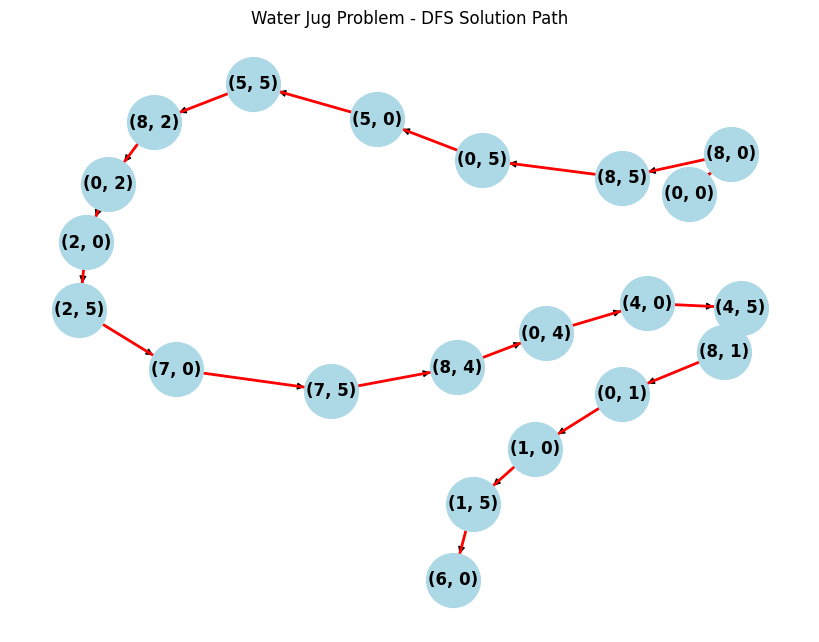


BFS Solution steps:
(0, 0)
(8, 0)
(3, 5)
(3, 0)
(0, 3)
(8, 3)
(6, 5)


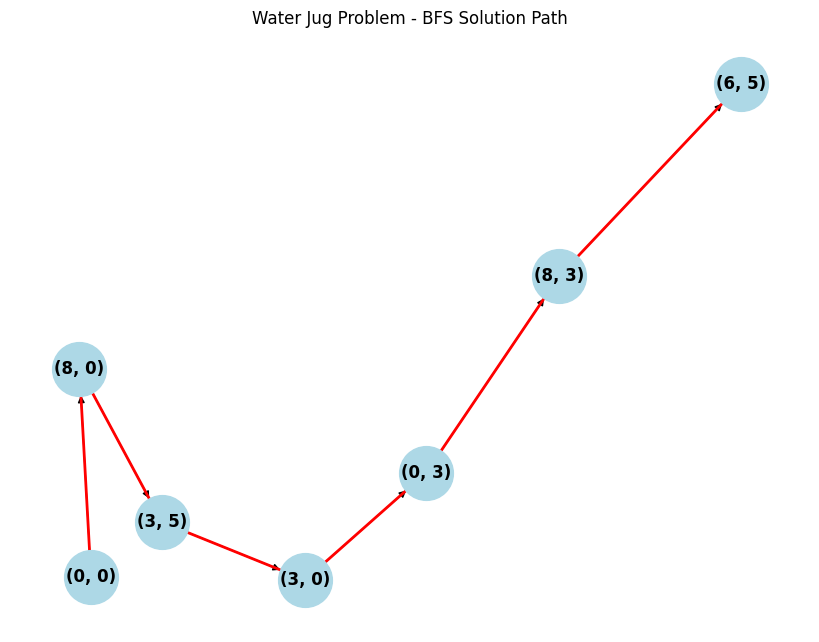

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# ------------------------ DFS Implementation ------------------------
def water_jug_dfs(capacity1, capacity2, target):
    visited = set()
    path = []

    def dfs(jug1, jug2):
        if (jug1, jug2) in visited:
            return False
        visited.add((jug1, jug2))
        path.append((jug1, jug2))

        if jug1 == target or jug2 == target:
            return True

        if dfs(capacity1, jug2):
            return True
        if dfs(jug1, capacity2):
            return True
        if dfs(0, jug2):
            return True
        if dfs(jug1, 0):
            return True
        if dfs(max(0, jug1 - (capacity2 - jug2)), min(capacity2, jug1 + jug2)):
            return True
        if dfs(min(capacity1, jug1 + jug2), max(0, jug2 - (capacity1 - jug1))):
            return True

        path.pop()
        return False

    dfs(0, 0)
    return path

# ------------------------ BFS Implementation ------------------------
def water_jug_bfs(capacity1, capacity2, target):
    visited = set()
    queue = deque()
    parent = {}

    queue.append((0, 0))
    visited.add((0, 0))
    parent[(0, 0)] = None  

    while queue:
        jug1, jug2 = queue.popleft()

        if jug1 == target or jug2 == target:
            path = []
            current = (jug1, jug2)
            while current is not None:
                path.append(current)
                current = parent[current]  # Safe backtrack: don't unpack None
            return path[::-1]

        next_states = [
            (capacity1, jug2),
            (jug1, capacity2),
            (0, jug2),
            (jug1, 0),
            (max(0, jug1 - (capacity2 - jug2)), min(capacity2, jug1 + jug2)),
            (min(capacity1, jug1 + jug2), max(0, jug2 - (capacity1 - jug1)))
        ]

        for state in next_states:
            if state not in visited:
                visited.add(state)
                parent[state] = (jug1, jug2)
                queue.append(state)

    return None

# ------------------------ Visualization ------------------------
def visualize_solution(path, title):
    G = nx.DiGraph()
    for i in range(len(path) - 1):
        G.add_edge(path[i], path[i + 1])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='red', width=2)
    plt.title(title)
    plt.show()

# ------------------------ User Input and Execution ------------------------
try:
    capacity1 = int(input("Enter capacity of Jug 1 (in liters): "))
    capacity2 = int(input("Enter capacity of Jug 2 (in liters): "))
    target = int(input("Enter target amount to measure (in liters): "))

    # DFS Solution
    dfs_solution = water_jug_dfs(capacity1, capacity2, target)
    if dfs_solution:
        print("\nDFS Solution steps:")
        for step in dfs_solution:
            print(step)
        visualize_solution(dfs_solution, "Water Jug Problem - DFS Solution Path")
    else:
        print("No DFS solution found.")

    # BFS Solution
    bfs_solution = water_jug_bfs(capacity1, capacity2, target)
    if bfs_solution:
        print("\nBFS Solution steps:")
        for step in bfs_solution:
            print(step)
        visualize_solution(bfs_solution, "Water Jug Problem - BFS Solution Path")
    else:
        print("No BFS solution found.")

except ValueError:
    print("Invalid input! Please enter integer values only.")
